# Sentiment Analysis on Game Reviews of Minecraft Legends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Data Collection from steam
import steamreviews
# library for language detection
import langdetect
request_params = dict()
# Reference: https://partner.steamgames.com/doc/store/getreviews
request_params['filter'] = 'all'  # reviews are sorted by helpfulness instead of chronology
request_params['day_range'] = '365'  # focus on reviews which were published during the past four weeks
# app product ID
app_id = 1928870
review_dict, query_count = steamreviews.download_reviews_for_app_id(app_id,
                                                                    chosen_request_params=request_params)

[appID = 1928870] expected #reviews = 2624


In [3]:
# datafields to extract
keys_to_extract = ['recommendationid', 'review', 'voted_up', 'votes_up', 'weighted_vote_score', 'steam_purchase']

In [4]:
#Extracting data from app_id(1928870) using reviews keys from dict
data=[]
for k, v in review_dict.items():
    #new_key = f"{parent_key}{sep}{k}" if parent_key else k
    if k == "reviews":
        for i, j in v.items():
            extracted_data = {key: j[key] for key in keys_to_extract if key in j}
            if extracted_data['review'] != '':
                # filtering reviews with english language text
                if langdetect.detect(extracted_data['review']) == 'en':
                    data.append(extracted_data)
                    #print(extracted_data['votes_up'])

In [5]:
# storing all data reviews on dataframe
review_df = pd.DataFrame(data)

In [6]:
review_df.dtypes

recommendationid       object
review                 object
voted_up                 bool
votes_up                int64
weighted_vote_score    object
steam_purchase           bool
dtype: object

In [7]:
# changing data types
review_df['recommendationid'] = review_df['recommendationid'].astype(int)
review_df['weighted_vote_score'] = review_df['weighted_vote_score'].astype(float)

In [8]:
review_df.head(10)

,recommendationid,review,voted_up,votes_up,weighted_vote_score,steam_purchase
0,178677205,"\nThe style of the game is not too bad, but I ...",False,3,0.527559,True
1,179089942,Such a great variant of RTS! I want to see mor...,True,0,0.000000,True
2,177614777,The game is mid,True,3,0.485613,True
3,178206345,this game some hot doo doo don't waste a singl...,False,4,0.423256,True
4,155858825,GAME IS BEING ABANDONED BY INCOMPETENT DEVS. D...,False,130,0.871307,True
5,163751033,"TLDR: Janky, unoptimized, unpolished, and over...",False,89,0.860874,True
6,163350728,This was abandoned 9 months after it's release...,False,208,0.905578,True
7,137696364,Mouse acceleration on by default! And no optio...,False,428,0.904428,False
8,137090078,"As a guy who grew up playing Starcraft 1 & 2, ...",True,118,0.847019,True
9,136993459,"Beat the campaign, 15 hours or so.\n\nWas on d...",False,128,0.829132,True


In [10]:
# descriptive stats on dataset
review_df.describe()

,recommendationid,votes_up,weighted_vote_score
count,1.130000e+02,113.000000,113.000000
mean,1.568335e+08,47.495575,0.574908
std,1.436466e+07,92.621747,0.251673
min,1.369136e+08,0.000000,0.000000
25%,1.423498e+08,3.000000,0.495374
50%,1.558599e+08,13.000000,0.628811
75%,1.671087e+08,43.000000,0.739084
max,1.818455e+08,672.000000,0.923590


In [11]:
# Data Preprocessing
# check for missing values
missing_values = review_df.isnull().sum()
# There are no missing values
missing_values

recommendationid       0
review                 0
voted_up               0
votes_up               0
weighted_vote_score    0
steam_purchase         0
dtype: int64

In [12]:
# check for duplicate values
review_df.duplicated().unique()
# data does not contain duplicate rows

array([False])

# Exploratory Data Analysis

In [13]:
review_df['voted_up'].value_counts()

voted_up
False    64
True     48
Name: count, dtype: int64

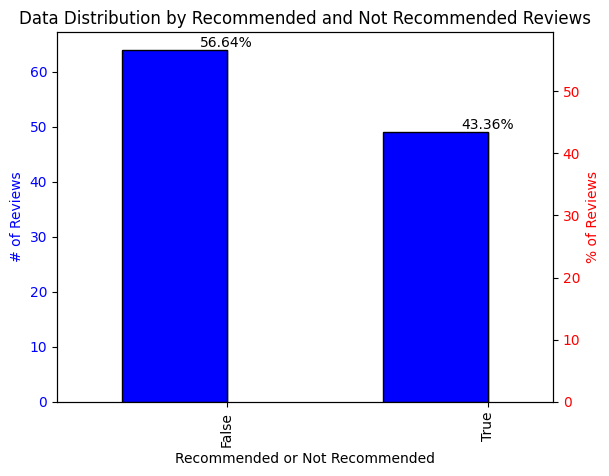

In [14]:
# visualization showing # of reviews recommended or not recommended based on positive or negative reviews written

Review_counts= review_df['voted_up'].value_counts()
Review_P_counts = review_df['voted_up'].value_counts(normalize=True) * 100

fig, ax1 = plt.subplots()

# Plot the bar chart
Review_counts.plot(kind='bar', ax=ax1, color='blue', edgecolor='black', position=0, width=0)
ax1.set_xlabel('Recommended or Not Recommended')
ax1.set_ylabel('# of Reviews', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for percentages
ax2 = ax1.twinx()
Review_P_counts.plot(kind='bar', ax=ax2, color='blue', edgecolor='black', position=1, width=0.4)
ax2.set_ylabel('% of Reviews', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Add percentage labels on top of the bars
for index, value in enumerate(Review_P_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.title('Data Distribution by Recommended and Not Recommended Reviews')
plt.show()

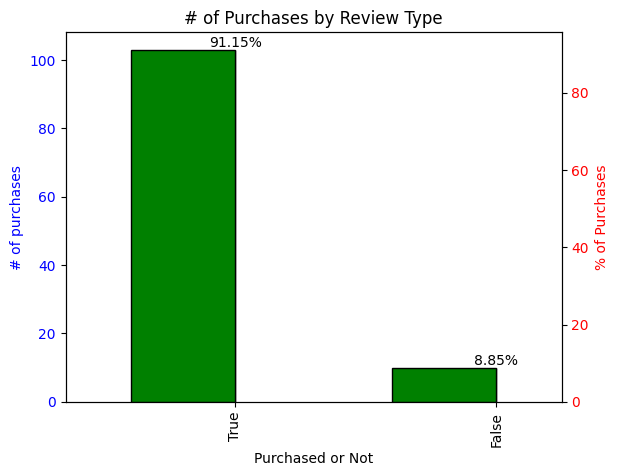

In [15]:
# visualization showing # of purchases based on reviews that were recommended or not
Purchase_counts= review_df['steam_purchase'].value_counts()
Purchase_P_counts = review_df['steam_purchase'].value_counts(normalize=True) * 100

fig, ax1 = plt.subplots()

# Plot the bar chart
Purchase_counts.plot(kind='bar', ax=ax1, color='blue', edgecolor='black', position=0, width=0)
ax1.set_xlabel('Purchased or Not')
ax1.set_ylabel('# of purchases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for percentages
ax2 = ax1.twinx()
Purchase_P_counts.plot(kind='bar', ax=ax2, color='green', edgecolor='black', position=1, width=0.4)
ax2.set_ylabel('% of Purchases', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add percentage labels on top of the bars
for index, value in enumerate(Purchase_P_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')
plt.title("# of Purchases by Review Type")
# Show the plot
plt.show()

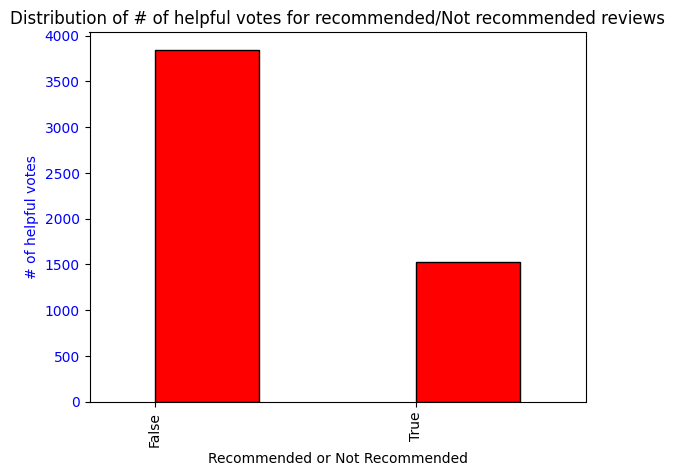

In [17]:
# visualization on # of helpful votes based on being recommended or not

Review_helpful_v= review_df.groupby('voted_up')['votes_up'].sum()


fig, ax1 = plt.subplots()

# Plot the bar chart
Review_helpful_v.plot(kind='bar', ax=ax1, color='red', edgecolor='black', position=0, width=0.4)
ax1.set_xlabel('Recommended or Not Recommended')
ax1.set_ylabel('# of helpful votes', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

plt.title("Distribution of # of helpful votes for recommended/Not recommended reviews")
# Show the plot
plt.show()

In [18]:
all_df_votes = review_df[['voted_up','votes_up']]

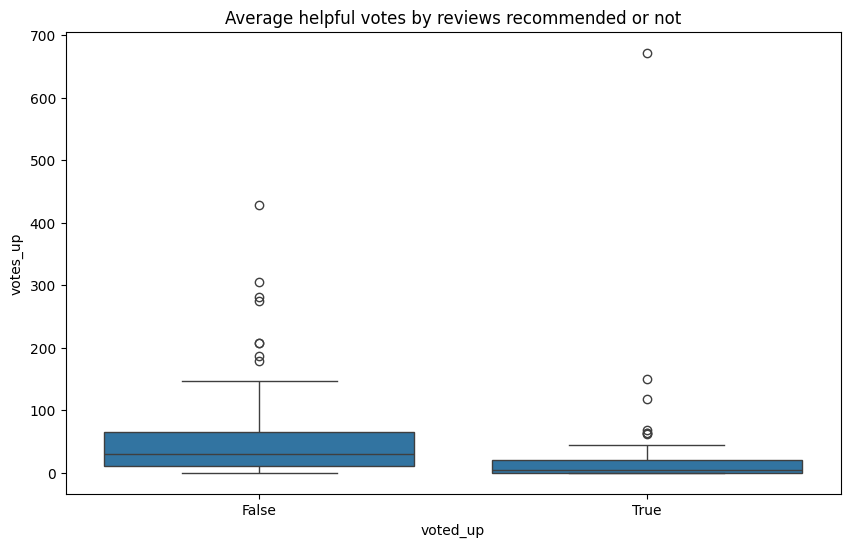

In [20]:
import seaborn as sns
# Create a box plot 
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='voted_up', y='votes_up', data=all_df_votes)
plt.title("Average helpful votes by reviews recommended or not")
plt.show()



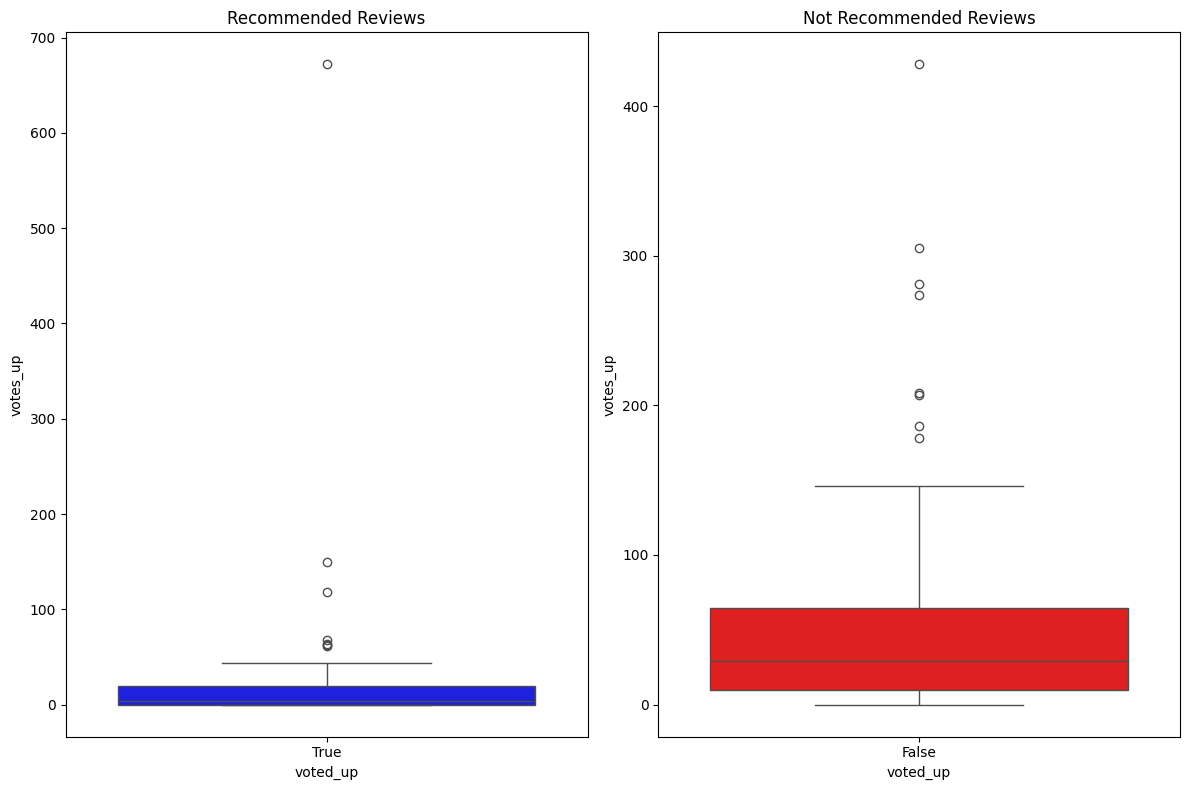

In [21]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Box plot for Category A
sns.boxplot(x='voted_up', y='votes_up', data=all_df_votes[all_df_votes['voted_up'] == True], ax=axes[0], color = 'blue')
axes[0].set_title('Recommended Reviews')

# Box plot for Category B
sns.boxplot(x='voted_up', y='votes_up', data=all_df_votes[all_df_votes['voted_up'] == False], ax=axes[1], color = 'red')
axes[1].set_title('Not Recommended Reviews')

# Show the plot
plt.tight_layout()
plt.show()

In [22]:

all_df_votes[all_df_votes['voted_up'] == True].describe().T

,count,mean,std,min,25%,50%,75%,max
votes_up,49.0,31.081633,98.42083,0.0,0.0,4.0,20.0,672.0


In [23]:
all_df_votes[all_df_votes['voted_up'] == False].describe().T

,count,mean,std,min,25%,50%,75%,max
votes_up,64.0,60.0625,86.607649,0.0,9.75,29.0,64.75,428.0


In [78]:
helpful_v__stats = pd.concat([helpful_v_1, helpful_v_2], axis=0)

In [95]:
#weighted score
all_df_weighted_score = review_df[['voted_up','weighted_vote_score']]

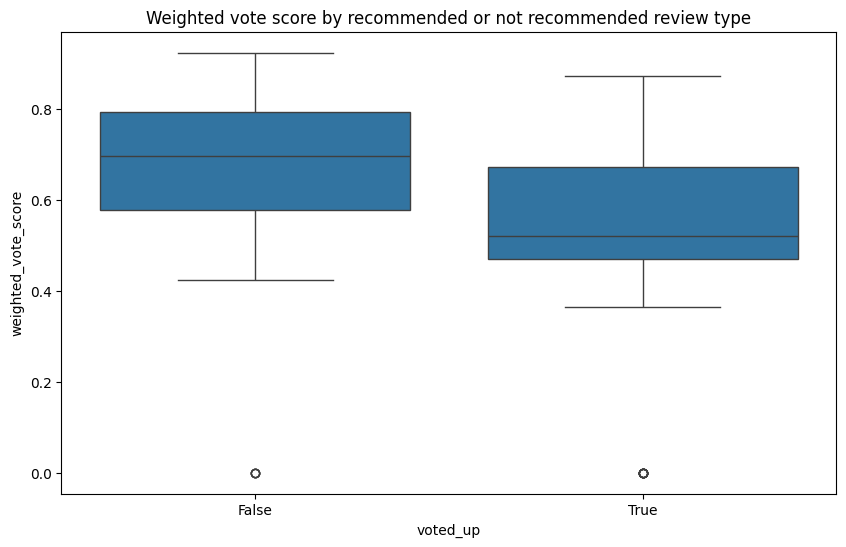

In [97]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='voted_up', y='weighted_vote_score', data=all_df_weighted_score)
plt.title('Weighted vote score by recommended or not recommended review type')
plt.show()

In [98]:
# Retreive most frequent words in a text
import re
import nltk
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Christina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Christina\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [99]:
english_words = set(words.words())

In [100]:
ps = PorterStemmer()
all_stopwords = stopwords.words('english')

In [101]:
def custom_tokenizer(text):
    tokens = nltk.word_tokenize(text)
    return [word for word in tokens if word.lower() in english_words]

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = all_stopwords, tokenizer=custom_tokenizer)

In [103]:
def featurenames (data):
    X = vectorizer.fit_transform(data)
    feature_names = vectorizer.get_feature_names_out()
    return feature_names

In [104]:
def vectorn(data):
    X = vectorizer.fit_transform(data)
    vector = pd.DataFrame(X.toarray(), columns=featurenames(data))
    return vector

In [105]:
allreviewstext = review_df['review'].values

In [106]:
all_feature_names = featurenames(allreviewstext)

C:\Users\Christina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Christina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [107]:
all_feature_names

array(['abandoned', 'abandonment', 'ability', ..., 'younger', 'zero',
       'zone'], dtype=object)

In [108]:
vector= vectorn(allreviewstext)

In [36]:
vector

,abandoned,abandonment,ability,able,abnormal,absolutely,acceleration,accidentally,account,across,...,wrong,ya,yeah,year,yes,yet,young,younger,zero,zone
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
text = []
count = []
for i in range(len(all_feature_names)):
    text.append(all_feature_names[i])
    count.append(vector[all_feature_names[i]].sum())

In [110]:
def topfeatures (txt, count):
    txt = np.array(text)
    cnt = np.array(count)

    # Sort the array in descending order
    sorted_indices = np.argsort(-cnt)

    # Get the top 15 values
    top5_values = cnt[sorted_indices[:20]]
    top5_features = txt[sorted_indices[:20]]

    print("Top 10 values:", top5_values)
    print("Top 10 features:", top5_features)

    top = np.concatenate((top5_features.reshape(len(top5_features),1), top5_values.reshape(len(top5_values),1)),1)
    topn = pd.DataFrame(top, columns = ['features', 'textcounts'])
    topn = topn.convert_dtypes()

    new_dtypes = {'features': 'string', 'textcounts': 'int32'}
    topn = topn.astype(new_dtypes)
    return topn

Top 10 values: [295  56  55  47  40  38  37  35  32  31  27  27  25  25  24  23  22  22
  21  21]
Top 10 features: ['game' 'like' 'fun' 'good' 'play' 'get' 'really' 'would' 'also'
 'campaign' 'could' 'base' 'make' 'feel' 'great' 'even' 'think' 'much'
 'time' 'worth']


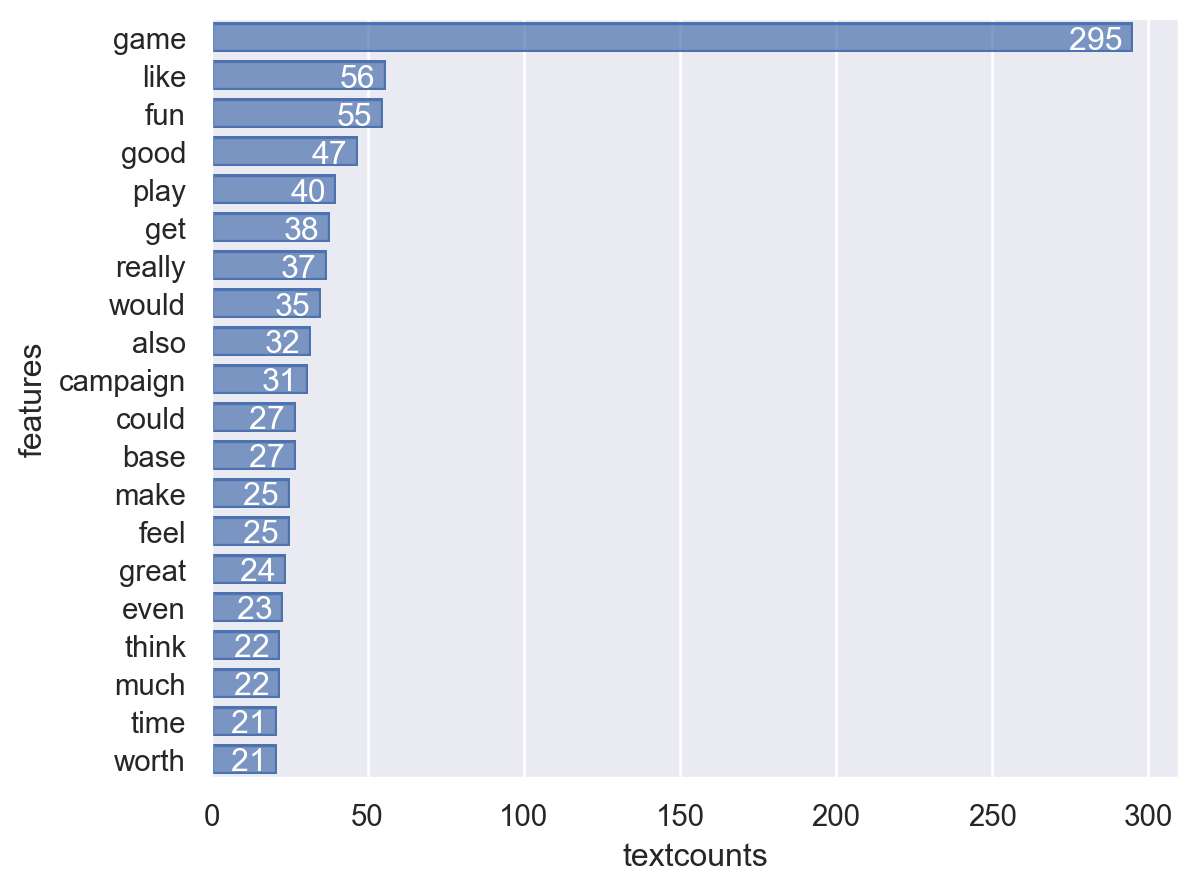

In [113]:
import seaborn as sns
import seaborn.objects as so
so.Plot(topfeatures(text,count), x="textcounts", y="features", text="textcounts")\
.add(so.Bar()).add(so.Text(color="w", halign="right"))

In [42]:
# create Wordcloud of review text

In [162]:
from wordcloud import WordCloud

def show_wordcloud(data,allstops):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=allstops,
        max_words=200,
        max_font_size=30,
        scale=3,
        random_state=1)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(25, 25))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()


In [151]:
# retreive one sample review
allreviewstext_one = allreviewstext[0]

In [152]:
allreviewstext[0]

"\nThe style of the game is not too bad, but I can't quite say it in its game support or others. \nFirst in terms of game, only few players play this game lately, resulting in you not being able to find random players to play with, and the bots of this game is very *perfunctory*. You cannot see anyone on the enemy base, but the base is defended by the system. The only thing you can do in the game is mine, defend, and attack the duplicate Piglin Fortress (or something like that). I mean it is boring. \nThen in terms of game support, I can't believe they only provide support for ONE YEAR and then announce that the game will no longer be supported. There are still some bugs waiting to be fixed like the wrong translation keys. I bought this game because of the 'Minecraft' name, even though Minecraft Dungeons wasn't great either.\nBeing totally disappointed to Minecraft games. I may not buy any more game with the name Minecraft. Mojang actually can only run the Minecraft itself well."

In [153]:
review_text_eng = custom_tokenizer(allreviewstext_one)

In [154]:
# review_text_eng is a list of tokens and stopwords is a set of stopwords
filtered_words = [token for token in review_text_eng if token not in all_stopwords]


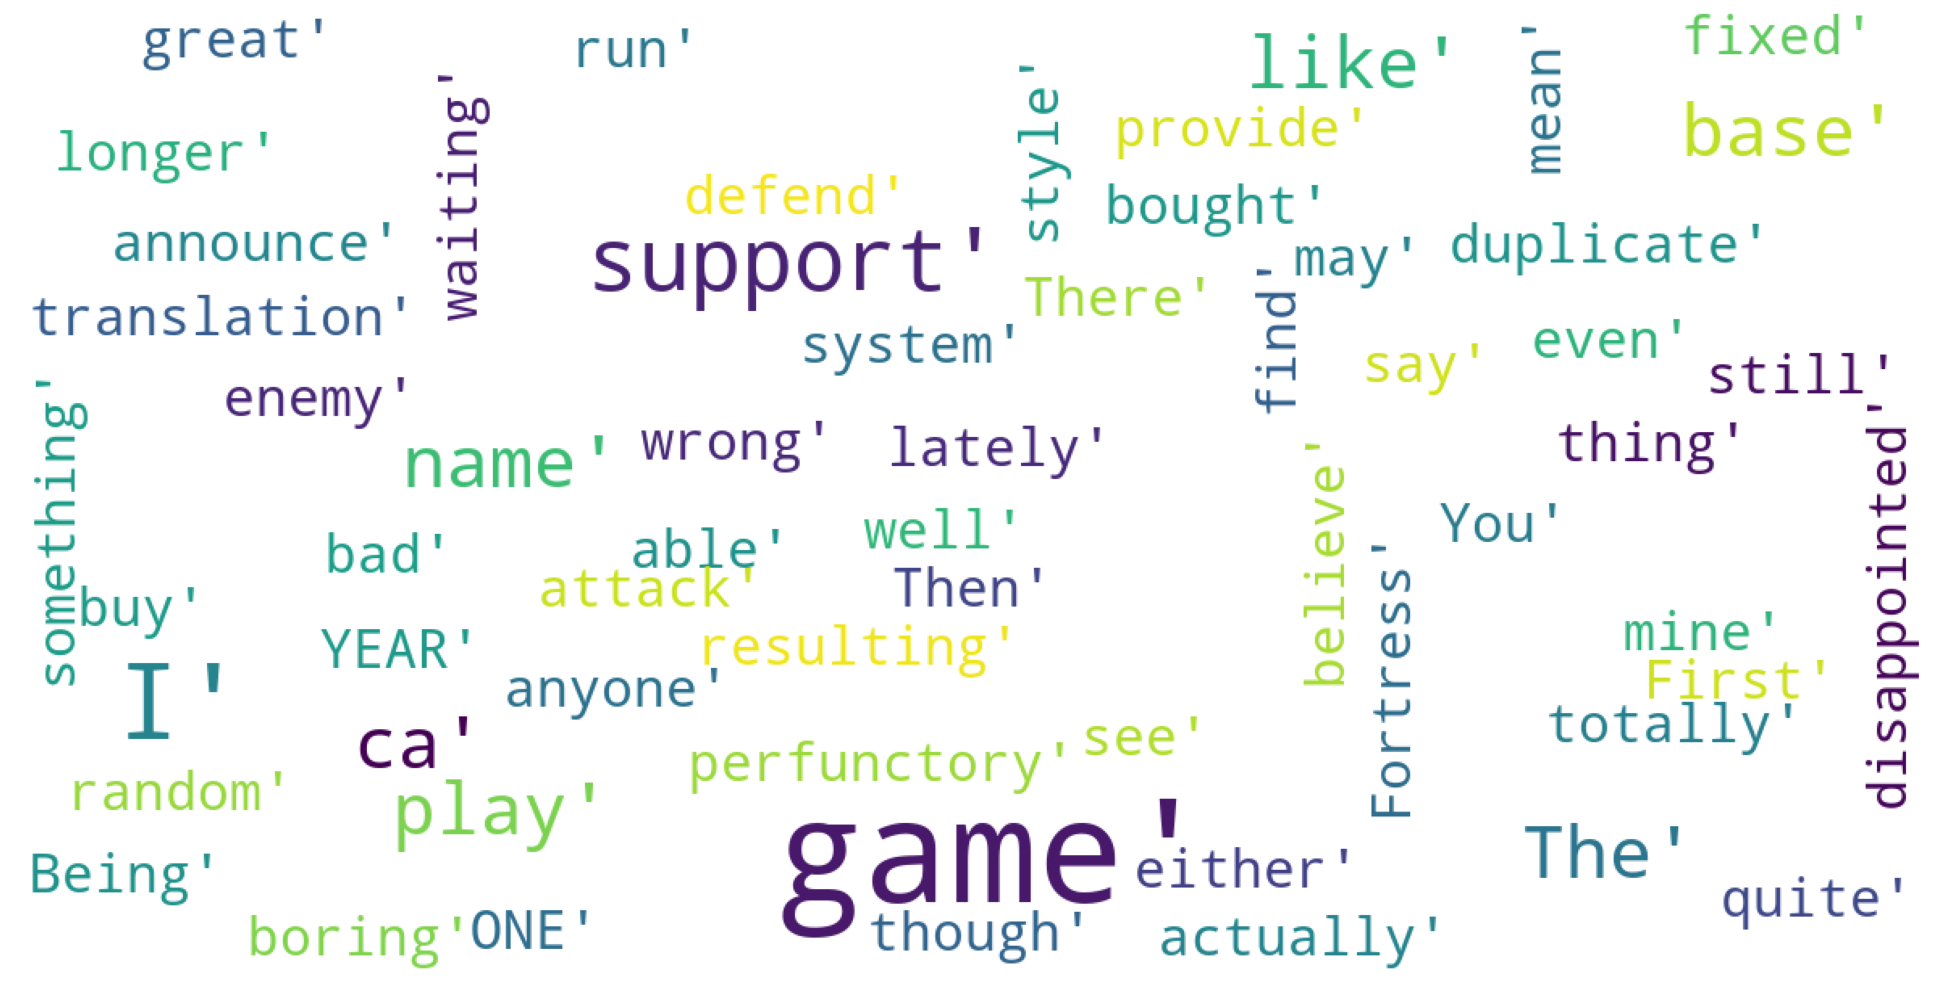

In [163]:
# show word cloud of a single review
show_wordcloud(filtered_words,all_stopwords)

In [160]:
# retreive random sample from feature vector
sample_size = 50
random_features = np.random.choice(all_feature_names, sample_size, replace=False).tolist()

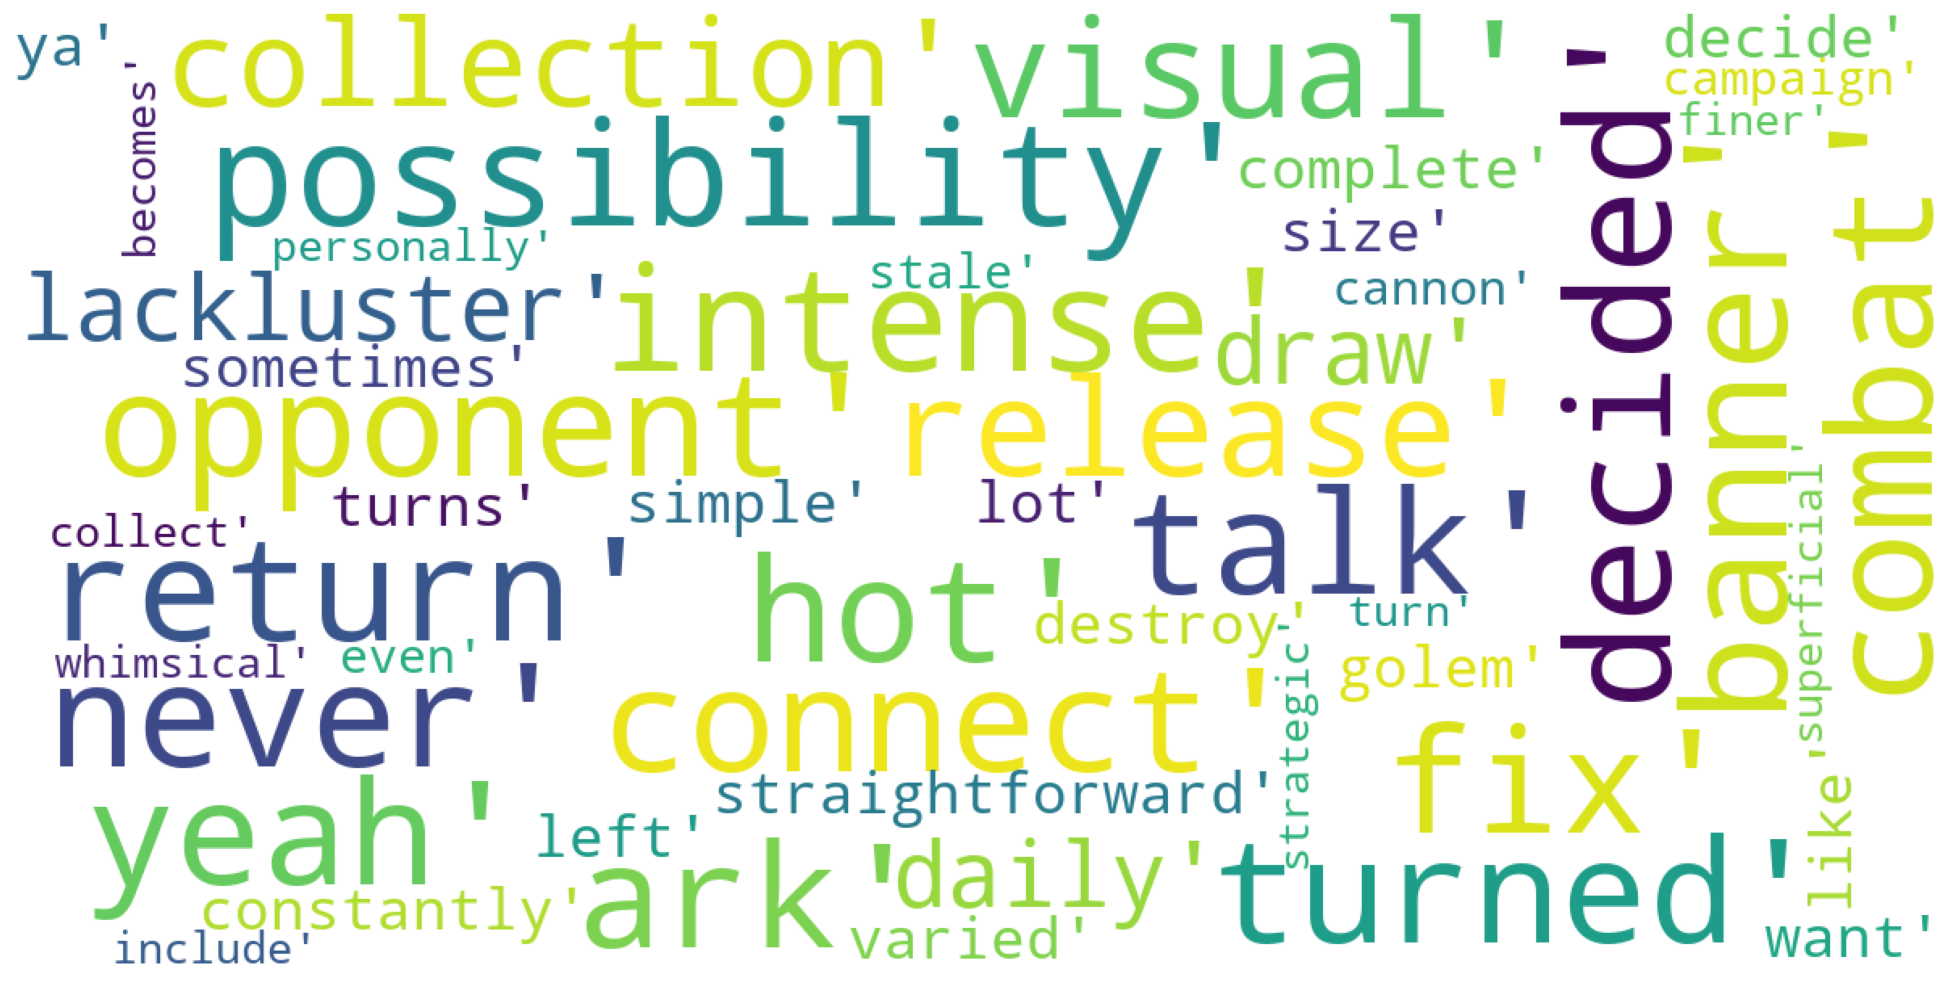

In [164]:
# word cloud of random sample of features
show_wordcloud(random_features,all_stopwords)

# Model Building

In [24]:
#Libraries to be imported
import spacy
from textblob import TextBlob
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag, ne_chunk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Christina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Christina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Christina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
# Downloads
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Christina\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [26]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define Functions

In [41]:
import re
def sentence_segmentation(r_text):
    # Lowercase conversion
    text = r_text.lower()
    # Remove special characters 
    cleaned_text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    sentences = sent_tokenize(cleaned_text)
    return sentences

In [28]:
def tokenization(r_sent):
    tokens = [word_tokenize(sentence) for sentence in r_sent]
    return tokens

In [30]:
def part_speech_tag(r_tok):
    pos_tags = [pos_tag(token) for token in r_tok]
    return pos_tags

In [31]:
def entity_detection(r_text):
    doc = nlp(r_text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [32]:
def relation_detection(r_text):
    relations = []
    doc = nlp(r_text)
    for token in doc:
        #print(token.dep_ )
        if token.dep_ in ("nsubj", "dobj"):
            relations.append((token.head.text, token.dep_, token.text))
    return relations


In [33]:
def sent_sentiment_score(r_sent):
    polarity_scores = []
    subjectivity_scores = []
    for sentence in r_sent:
        blob = TextBlob(sentence)
        sentiment_polarity = blob.sentiment.polarity
        sentiment_subjectivity = blob.sentiment.subjectivity
        polarity_scores.append(sentiment_polarity)
        subjectivity_scores.append(sentiment_subjectivity)
    return(polarity_scores, subjectivity_scores)


In [34]:
def avg_score(p_score,s_score):
    polarity = np.array(p_score)
    subjectivity = np.array(s_score)
    polarity_avg = np.average(polarity)
    subjectivity_avg = np.average(subjectivity)
    return polarity_avg, subjectivity_avg

In [35]:
def weighted_polarity_score(p_avg, s_avg):
    if (s_avg != 0) :
        Weighted_avg_polarity = p_avg/s_avg
    else:
        Weighted_avg_polarity = 0
    return Weighted_avg_polarity
    

In [59]:
text = review_df['review'][0]

In [60]:
text

"\nThe style of the game is not too bad, but I can't quite say it in its game support or others. \nFirst in terms of game, only few players play this game lately, resulting in you not being able to find random players to play with, and the bots of this game is very *perfunctory*. You cannot see anyone on the enemy base, but the base is defended by the system. The only thing you can do in the game is mine, defend, and attack the duplicate Piglin Fortress (or something like that). I mean it is boring. \nThen in terms of game support, I can't believe they only provide support for ONE YEAR and then announce that the game will no longer be supported. There are still some bugs waiting to be fixed like the wrong translation keys. I bought this game because of the 'Minecraft' name, even though Minecraft Dungeons wasn't great either.\nBeing totally disappointed to Minecraft games. I may not buy any more game with the name Minecraft. Mojang actually can only run the Minecraft itself well."

In [43]:
# Step 1: Sentence Segmentation
sent = sentence_segmentation(text)

In [281]:
sent

['\nthe style of the game is not too bad but i cant quite say it in its game support or others \nfirst in terms of game only few players play this game lately resulting in you not being able to find random players to play with and the bots of this game is very perfunctory you cannot see anyone on the enemy base but the base is defended by the system the only thing you can do in the game is mine defend and attack the duplicate piglin fortress or something like that i mean it is boring \nthen in terms of game support i cant believe they only provide support for one year and then announce that the game will no longer be supported there are still some bugs waiting to be fixed like the wrong translation keys i bought this game because of the minecraft name even though minecraft dungeons wasnt great either\nbeing totally disappointed to minecraft games i may not buy any more game with the name minecraft mojang actually can only run the minecraft itself well']

In [44]:
# Step 2: Tokenization
token = tokenization(sent)


In [45]:
# Step 3: Part of Speech Tagging
pos_tag = part_speech_tag(token)
print(pos_tag)

[[('the', 'DT'), ('style', 'NN'), ('of', 'IN'), ('the', 'DT'), ('game', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('too', 'RB'), ('bad', 'JJ'), ('but', 'CC'), ('i', 'JJ'), ('cant', 'JJ'), ('quite', 'NNS'), ('say', 'VBP'), ('it', 'PRP'), ('in', 'IN'), ('its', 'PRP$'), ('game', 'NN'), ('support', 'NN'), ('or', 'CC'), ('others', 'NNS'), ('first', 'RB'), ('in', 'IN'), ('terms', 'NNS'), ('of', 'IN'), ('game', 'NN'), ('only', 'RB'), ('few', 'JJ'), ('players', 'NNS'), ('play', 'VBP'), ('this', 'DT'), ('game', 'NN'), ('lately', 'RB'), ('resulting', 'VBG'), ('in', 'IN'), ('you', 'PRP'), ('not', 'RB'), ('being', 'VBG'), ('able', 'JJ'), ('to', 'TO'), ('find', 'VB'), ('random', 'JJ'), ('players', 'NNS'), ('to', 'TO'), ('play', 'VB'), ('with', 'IN'), ('and', 'CC'), ('the', 'DT'), ('bots', 'NNS'), ('of', 'IN'), ('this', 'DT'), ('game', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('perfunctory', 'JJ'), ('you', 'PRP'), ('can', 'MD'), ('not', 'RB'), ('see', 'VB'), ('anyone', 'NN'), ('on', 'IN'), ('the', 'DT'), ('

In [46]:
# Extract POS tags and their corresponding tokens
pos_labels = [tag for word, tag in pos_tag[0]]
tokens_w = [word for word, tag in pos_tag[0]]

In [296]:
#limited_pos_tag = pos_tag[:1]

In [61]:
len(pos_values)

182

In [297]:
# Iterate through multiple values for i
#pos_labels = []
#tokens_w = []
#for i in range(len(limited_pos_tag)):
    p_labels = [tag for word, tag in limited_pos_tag[i]]
    p_tokens = [word for word, tag in limited_pos_tag[i]]
    pos_labels.extend(p_labels)
    tokens_w.extend(p_tokens)

In [47]:
# Create a dictionary to map POS tags to numerical values for plotting
pos_to_num = {pos: i for i, pos in enumerate(set(pos_labels))}
# Convert POS tags to numerical values
pos_values = [pos_to_num[pos] for pos in pos_labels]

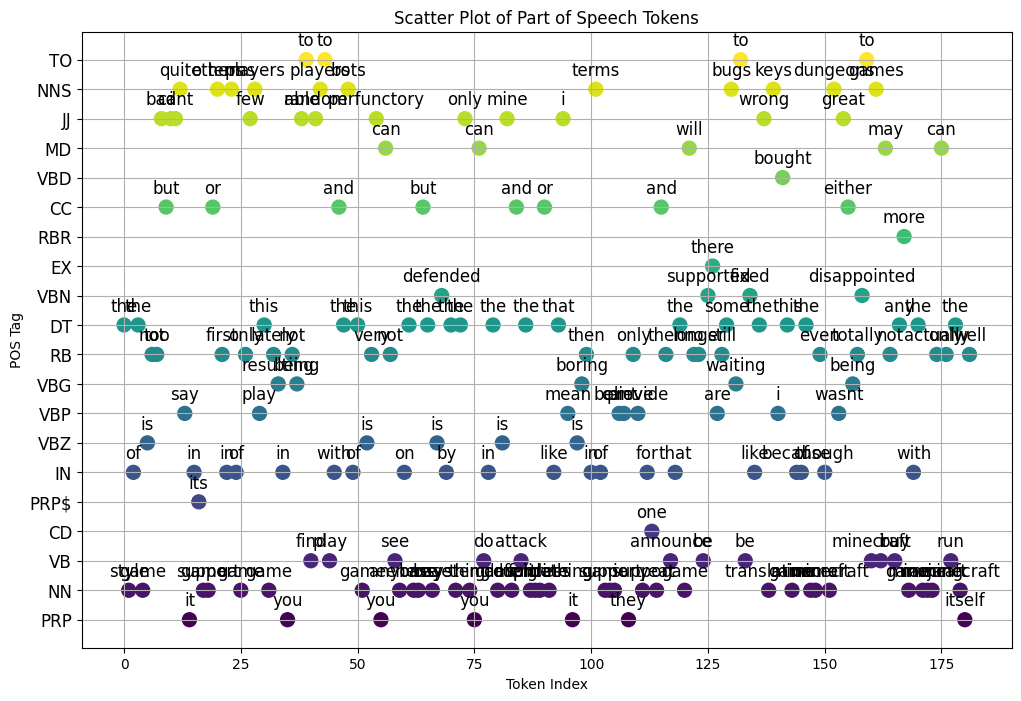

In [48]:
# Step 3: Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(range(len(tokens_w)), pos_values, c=pos_values, cmap='viridis', s=100)

# Annotate the points with tokens
for i, token in enumerate(tokens_w):
    plt.annotate(token, (i, pos_values[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)

# Set plot labels and title
plt.xlabel('Token Index')
plt.ylabel('POS Tag')
plt.title('Scatter Plot of Part of Speech Tokens')
plt.yticks(ticks=list(pos_to_num.values()), labels=list(pos_to_num.keys()),fontsize=12 )
plt.grid(True)
plt.show()


In [62]:
# Step 4: Entity Detection (Named Entity Recognition)
entity = entity_detection(text)
print(entity)

[('First', 'ORDINAL'), ('Piglin Fortress', 'PERSON'), ('ONE', 'CARDINAL'), ('Minecraft Dungeons', 'ORG'), ('Minecraft', 'PRODUCT'), ('Mojang', 'PERSON'), ('Minecraft', 'PRODUCT')]


In [63]:
# Step 5: Relation Detection
relation = relation_detection(text)
print(relation)

[('is', 'nsubj', 'style'), ('say', 'nsubj', 'I'), ('say', 'dobj', 'it'), ('play', 'nsubj', 'players'), ('play', 'dobj', 'game'), ('find', 'dobj', 'players'), ('is', 'nsubj', 'bots'), ('see', 'nsubj', 'You'), ('see', 'dobj', 'anyone'), ('is', 'nsubj', 'thing'), ('do', 'nsubj', 'you'), ('attack', 'dobj', 'duplicate'), ('attack', 'dobj', 'Fortress'), ('mean', 'nsubj', 'I'), ('is', 'nsubj', 'it'), ('believe', 'nsubj', 'I'), ('provide', 'nsubj', 'they'), ('provide', 'dobj', 'support'), ('bought', 'nsubj', 'I'), ('bought', 'dobj', 'game'), ('was', 'nsubj', 'Dungeons'), ('buy', 'nsubj', 'I'), ('buy', 'dobj', 'game'), ('run', 'nsubj', 'Mojang'), ('run', 'dobj', 'Minecraft')]


In [64]:
# Step 6: Retreive Sentiment Scores
pol_score, sub_score = sent_sentiment_score(sent)
print(pol_score, sub_score)

[-0.2423387096774194] [0.5810483870967743]


In [65]:
# Step 7: Sentiment Analysis based on positive or negative scores
polarity_avg, subjectivity__avg = avg_score(pol_score,sub_score)
print(polarity_avg, subjectivity__avg)

-0.2423387096774194 0.5810483870967743


In [66]:
#Weighted Average Polarity: This score takes into account the strength of opinions (subjectivity) when calculating the overall sentiment. 
#Higher subjective sentences have more influence on the overall polarity
w_pol_score = weighted_polarity_score(polarity_avg, subjectivity__avg)
print(w_pol_score)

-0.4170714781401804


In [67]:
# Apply sentiment analysis approach for all reviews
reviews = review_df['review'].values


In [68]:
Review_sentiment_scores = []
for review in reviews:
    # sentence segmentation
    review_sent = sentence_segmentation(review)
    #get sentiment scores
    review_pol_score, review_sub_score = sent_sentiment_score(review_sent)
    review_polarity_avg, review_subjectivity_avg = avg_score(review_pol_score,review_sub_score)
    review_w_score = weighted_polarity_score(review_polarity_avg, review_subjectivity_avg)
    Review_sentiment_scores.append(review_w_score)

In [307]:
print(Review_sentiment_scores)

[-0.4170714781401804, 0.62, -1.0, -0.5365750528541225, -0.09058614564831262, -0.015352480417754562, 0.631578947368421, 0.0, -0.03277697861947608, -0.5714285714285715, 0.14027068740353793, -0.008403361344537843, 0.12499999999999996, 0.13885429638854294, 0.2202337472607743, -0.2562912681773166, -0.06675938803894295, 0.024662990196078413, -0.26454183266932274, -0.1032469527809075, 0.6279069767441858, -0.29327176899054164, -0.06456692913385831, 0.21339563862928346, -0.04208416833667336, -0.20916819287003624, -0.29850746268656714, 0.09142857142857143, 0.1429123810996829, 0.33860977288368893, -0.06624019810152704, -0.019765256462915253, -0.08054701238737864, -0.18310383327130628, -0.04024767801857587, 0.2312814895947425, 0.13636363636363635, -0.15884861407249465, 0.08333333333333331, 0.0613287904599659, -0.2743362831858407, -0.19306930693069313, 0.035087719298245584, 0.28844744800922917, 0.6618181818181817, -0.3309859154929577, 0.22727272727272727, 0.020671834625322967, 0.43749999999999994, 

In [69]:
# Get actual reviews based on review type
actual_review_sentiments = review_df['voted_up'].values

In [70]:
# function of getting sentiment 
def get_sentiment(review):
    review_sent = sentence_segmentation(review)
    review_pol_score, review_sub_score = sent_sentiment_score(review_sent)
    review_polarity_avg, review_subjectivity_avg = avg_score(review_pol_score,review_sub_score)
    review_w_score = weighted_polarity_score(review_polarity_avg, review_subjectivity_avg)
    return review_w_score
    

In [71]:
# Apply the function to each review
review_df['Sentiment'] = review_df['review'].apply(get_sentiment)
# Categorize the sentiment
review_df['Sentiment Category'] = review_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')


In [72]:
# Actual values
review_df['Actual Category'] = review_df['voted_up'].apply(lambda x: 'Positive' if x is True else 'Negative')

In [73]:
review_df.head(10)

,recommendationid,review,voted_up,votes_up,weighted_vote_score,steam_purchase,Sentiment,Sentiment Category,Actual Category
0,178677205,"\nThe style of the game is not too bad, but I ...",False,3,0.527559,True,-0.417071,Negative,Negative
1,179089942,Such a great variant of RTS! I want to see mor...,True,0,0.000000,True,0.620000,Positive,Positive
2,177614777,The game is mid,True,3,0.485613,True,-1.000000,Negative,Positive
3,178206345,this game some hot doo doo don't waste a singl...,False,4,0.423256,True,-0.536575,Negative,Negative
4,155858825,GAME IS BEING ABANDONED BY INCOMPETENT DEVS. D...,False,130,0.871307,True,-0.090586,Negative,Negative
5,163751033,"TLDR: Janky, unoptimized, unpolished, and over...",False,89,0.860874,True,-0.015352,Negative,Negative
6,163350728,This was abandoned 9 months after it's release...,False,208,0.905578,True,0.631579,Positive,Negative
7,137696364,Mouse acceleration on by default! And no optio...,False,428,0.904428,False,0.000000,Negative,Negative
8,137090078,"As a guy who grew up playing Starcraft 1 & 2, ...",True,118,0.847019,True,-0.032777,Negative,Positive
9,136993459,"Beat the campaign, 15 hours or so.\n\nWas on d...",False,128,0.829132,True,-0.571429,Negative,Negative


In [74]:
sent_pred = review_df['Sentiment Category'].values

In [75]:
sent_actual = review_df['Actual Category'].values

# Model Accuracy

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(sent_actual, sent_pred)
print(cm)
accuracy_score(sent_actual, sent_pred)

[[40 24]
 [14 35]]


0.6637168141592921

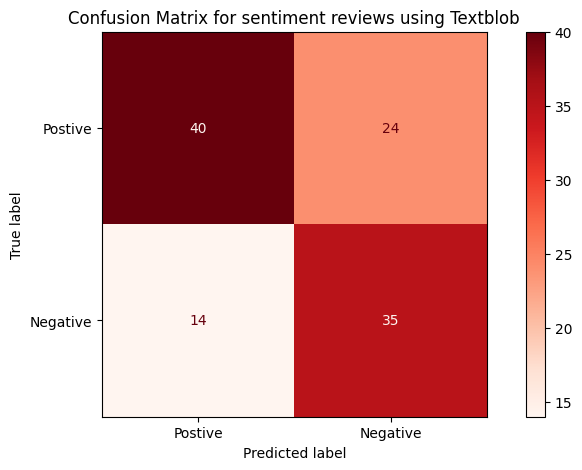

In [80]:
target_names = ['Postive', 'Negative']
from sklearn.metrics import *
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(sent_actual, sent_pred, ax=ax, cmap="Reds")
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for sentiment reviews using Textblob"
)

In [79]:
# Measuring accuracy (precision and f1-score) on training dataset
from sklearn.metrics import classification_report
print('---------- Accuracy report on Sentiments ----------')
print(classification_report(sent_actual, sent_pred))

---------- Accuracy report on Sentiments ----------
              precision    recall  f1-score   support

    Negative       0.74      0.62      0.68        64
    Positive       0.59      0.71      0.65        49

    accuracy                           0.66       113
   macro avg       0.67      0.67      0.66       113
weighted avg       0.68      0.66      0.67       113



In [81]:
pwd

'C:\\Users\\Christina\\OU-ML Class - Jupyternotebooks\\IR Project2'